In [4]:
import os
path=os.getcwd()

import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

In [5]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [6]:
# id 별로 각각 600개의 데이터가 있음을 확인
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [7]:
# train_labels.csv에서 id가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


<AxesSubplot:>

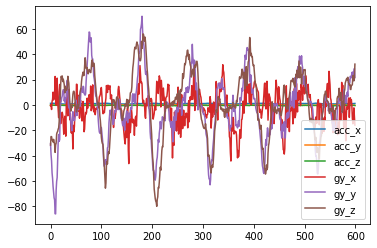

In [34]:
# id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

<AxesSubplot:>

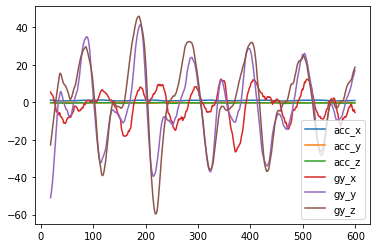

In [35]:
ex_mean = ex.rolling(window = 20).mean()
ex_mean.iloc[:, 2:].plot()

<AxesSubplot:>

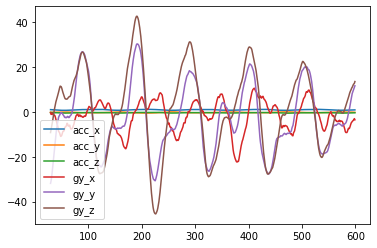

In [36]:
ex_mean = ex.rolling(window = 30).mean()
ex_mean.iloc[:, 2:].plot()

<AxesSubplot:>

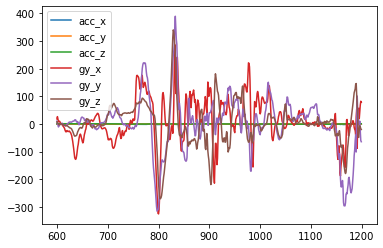

In [37]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

<AxesSubplot:>

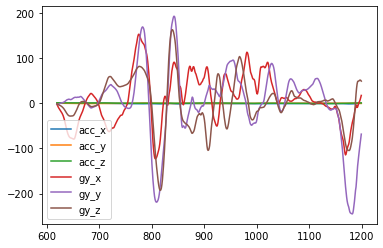

In [38]:
ex_mean = ex.rolling(window = 20).mean()
ex_mean.iloc[:, 2:].plot()

<AxesSubplot:>

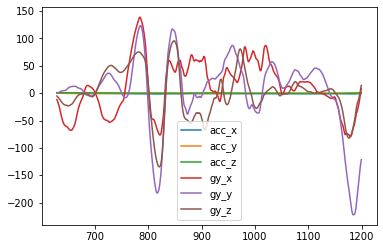

In [39]:
ex_mean = ex.rolling(window = 30).mean()
ex_mean.iloc[:, 2:].plot()

<AxesSubplot:>

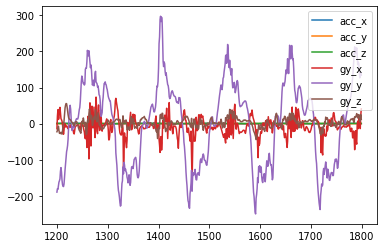

In [40]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

<AxesSubplot:>

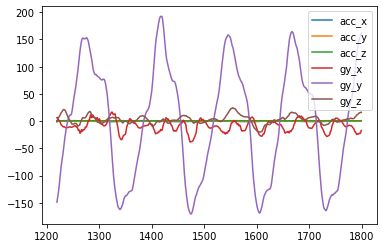

In [41]:
ex_mean = ex.rolling(window = 20).mean()
ex_mean.iloc[:, 2:].plot()

<AxesSubplot:>

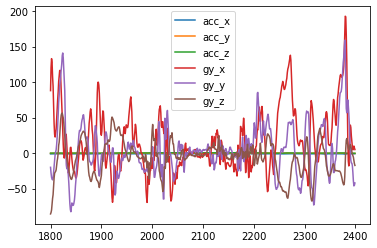

In [42]:
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

<AxesSubplot:>

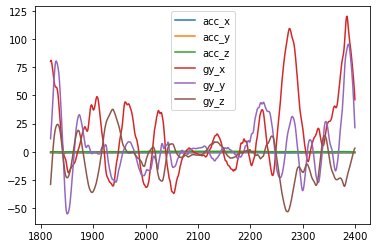

In [43]:
ex_mean = ex.rolling(window = 20).mean()
ex_mean.iloc[:, 2:].plot()

<AxesSubplot:>

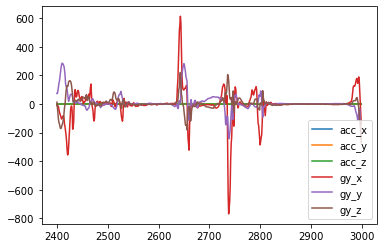

In [44]:
ex=train[train['id']==4]
ex.iloc[:,2:].plot()

<AxesSubplot:>

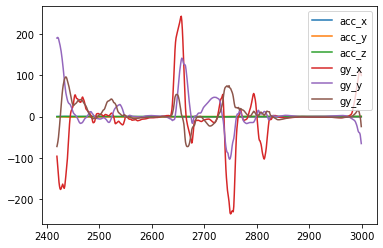

In [45]:
ex_mean = ex.rolling(window = 20).mean()
ex_mean.iloc[:, 2:].plot()

<AxesSubplot:>

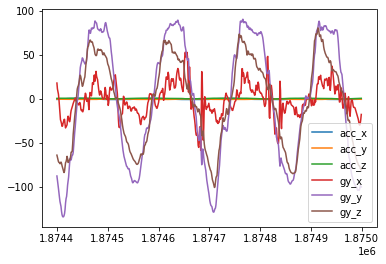

In [46]:
ex=train[train['id']==3124]
ex.iloc[:,2:].plot()

<AxesSubplot:>

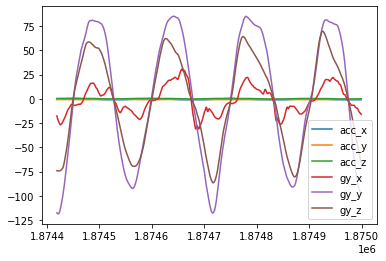

In [47]:
ex_mean = ex.rolling(window = 20).mean()
ex_mean.iloc[:, 2:].plot()

In [13]:
test['id'].nunique()

782

In [15]:
# 782개의 id 별 동작 데이터를 활용해 각각의 id가 어떤 동작인지를 분류하는 문제
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
